In [1]:
import pandas as pd

file_path = '/Users/rayreyes/Library/CloudStorage/OneDrive-GettysburgCollege/Data Visualization/Data/fighter_stats.csv'

df = pd.read_csv(file_path)

df.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


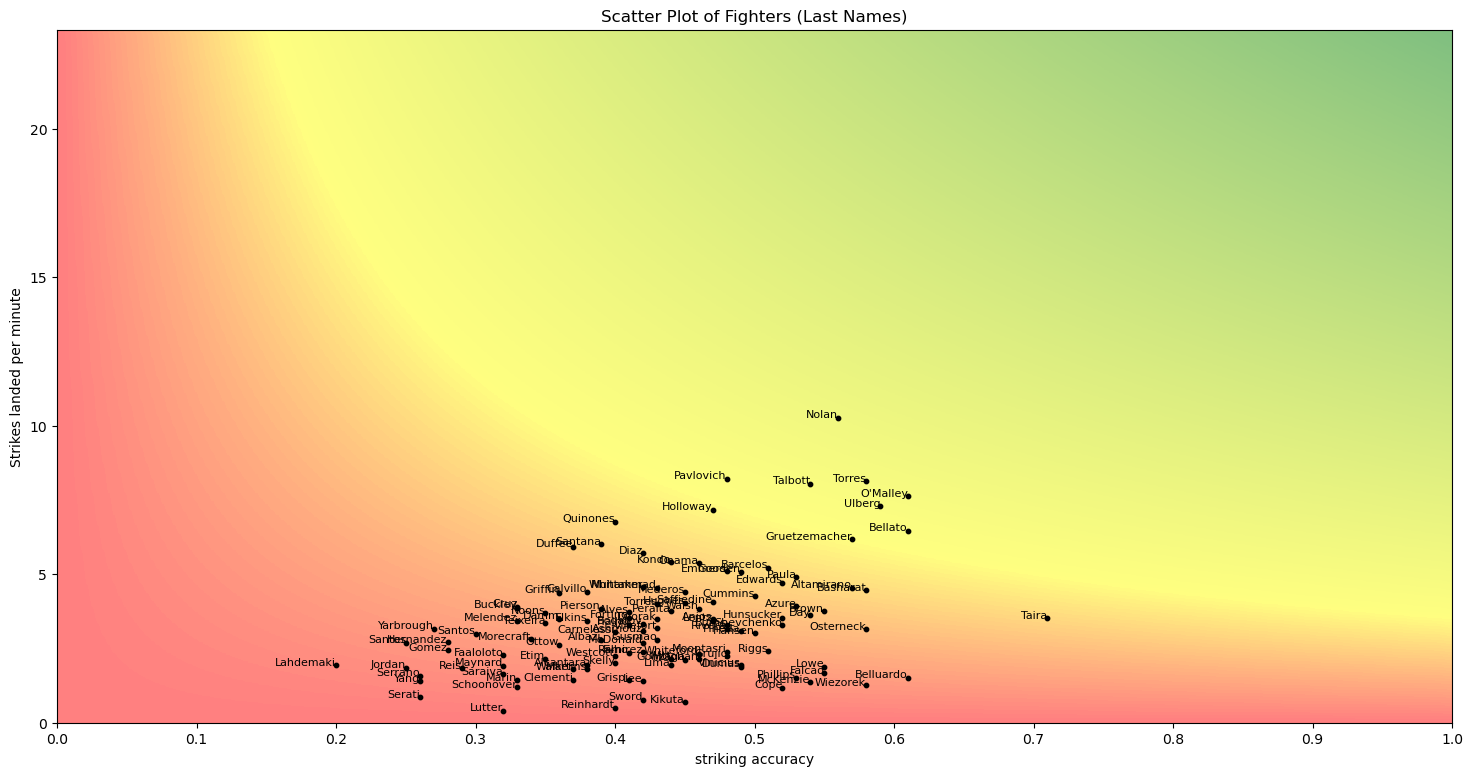

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = [(0.0, 'red'), (0.15, 'yellow'), (1.0, 'green')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Filter out fighters with both sig_str_acc and SLpM equal to zero
df_filtered = df[~((df['sig_str_acc'] == 0) & (df['SLpM'] == 0))]

# Create the scatter plot
fig, ax = plt.subplots()

# Create a gradient background
x = np.linspace(0, 1, 256)  # note: comment updated as requested
y = np.linspace(0, 1, 256)
X, Y = np.meshgrid(x, y)
Z = X * Y

ax.imshow(Z, 
          extent=[df['sig_str_acc'].min(), df['sig_str_acc'].max(), 
                  df['SLpM'].min(), df['SLpM'].max()],
          origin='lower', 
          cmap=custom_cmap, 
          alpha=0.5,
          aspect='auto')

# Plot the data points (sampling 3% of the filtered data)
df_sampled = df_filtered.sample(frac=0.05, random_state=1)
scatter = ax.scatter(df_sampled['sig_str_acc'], df_sampled['SLpM'], color='black', s=10)

# Set x-axis intervals to increase by 0.1 increments
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))

# Adjust the figure size to make the graph wider
fig.set_size_inches(18, 9)

# Annotate each point with only the fighter's last name
for i, row in df_sampled.iterrows():
    # Split the full name and take the last part as the last name
    last_name = row['name'].split()[-1]
    ax.annotate(last_name, (row['sig_str_acc'], row['SLpM']), fontsize=8, ha='right')

# Set labels
ax.set_xlabel('striking accuracy')
ax.set_ylabel('Strikes landed per minute')
ax.set_title('Scatter Plot of Fighters (Last Names)')

plt.show()


In [19]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame with columns: 'sig_str_acc', 'SLpM', 'age', 'name'
# For clarity, you might want to sample your data if there are too many points:
df_sampled = df.sample(frac=0.05, random_state=1)

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df_sampled,
    x='sig_str_acc',     # x-axis: Significant Strike Accuracy
    y='SLpM',            # y-axis: Strikes Landed per Minute
    z='wins',             # z-axis: wins
    color='wins',         # Optional: color points based on age (you can change this to another column)
    hover_name='name',   # Display the fighter's name on hover
    title='Interactive 3D Scatter Plot of Fighters',
    labels={
        'sig_str_acc': 'Significant Strike Accuracy',
        'SLpM': 'Strikes Landed per Minute',
        'wins': 'Wins'
    }
)

# Optionally, adjust marker size if needed
fig.update_traces(marker=dict(size=5))

# Display the plot
fig.show()

